<a href="https://colab.research.google.com/github/gwonchan/dds/blob/main/jason_yoon_homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

# You might need to download the NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')

# Replace these URLs with the actual URLs of the Gutenberg texts
text_urls = [
    'http://www.gutenberg.org/files/1342/1342-0.txt',  # Example: Pride and Prejudice by Jane Austen
    'http://www.gutenberg.org/files/11/11-0.txt',     # Example: Alice's Adventures in Wonderland by Lewis Carroll
    # Add more URLs as needed
]

def fetch_text_from_url(url):
    response = requests.get(url)
    return response.text

def calculate_lexical_diversity(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords.words('english')]
    unique_words = set(words)
    return len(unique_words) / len(words)

for url in text_urls:
    text = fetch_text_from_url(url)
    lexical_diversity = calculate_lexical_diversity(text)
    print(f"Lexical Diversity Score for '{url}': {lexical_diversity:.4f}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Lexical Diversity Score for 'http://www.gutenberg.org/files/1342/1342-0.txt': 0.1202
Lexical Diversity Score for 'http://www.gutenberg.org/files/11/11-0.txt': 0.2105


Homework 1


Install Python (if you don’t have it already) and install NLTK.   


Follow the instructions in chapter 1 of Bird-Klein for implementing a “lexical diversity” scoring routine.


Go to http://www.gutenberg.org/ebooks/bookshelf/215  and select texts of different grade levels (e.g., fourth reader, fifth reader et al)

Report the lexical diversity score of each. Explain whether the result was surprising.
[ans] According to the plot of lexical diversity score and contents words of each books below, I see negative linear relationship and it is quite surprising because I expected positive. I want to run more samples and to see the relationship!

Also compare the vocabulary size of the same three texts. Explain whether the result was surprising.   
[ans] A higher lexical diversity score might be expected for more complex or diverse writing styles, such as literary novels, academic papers, or essays. On the other hand, texts that are more focused on a specific topic or are written in a simpler style might have a lower lexical diversity score.

Write a paragraph arguing whether vocabulary size and lexical diversity in combination could be a better measure of text difficulty (or reading level) than either measure is by itself.

[ANS] By combining both measures, we gain a richer understanding of text difficulty. A text with a large vocabulary and high lexical diversity could be indicative of a sophisticated composition that uses a wide range of words in a skillful manner.
Moreover, I want to learn about the gutenberg phase 3 if it is related to this course!





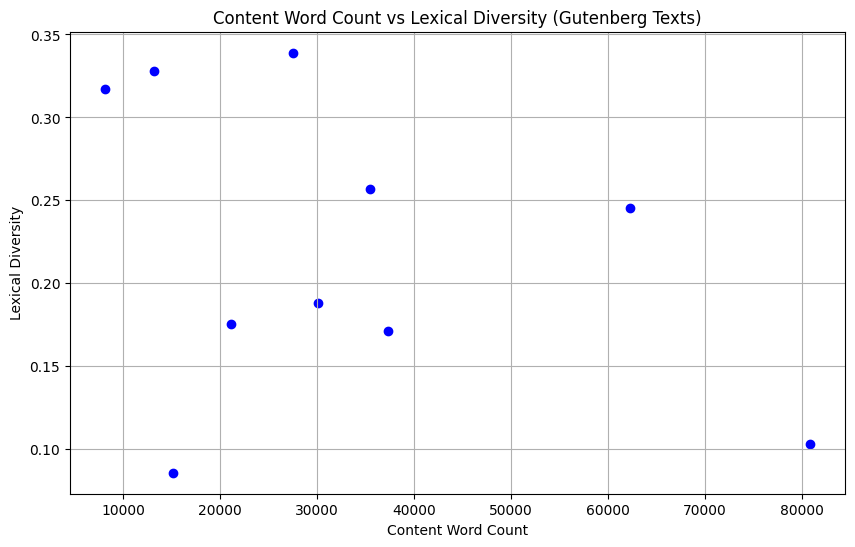

In [3]:
import requests
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# You might need to download the NLTK data and install matplotlib
#nltk.download('punkt')
#nltk.download('stopwords')
#!pip install matplotlib

# Sample Gutenberg URLs
gutenberg_urls = [
    'http://www.gutenberg.org/files/1342/1342-0.txt',  # Example: Pride and Prejudice by Jane Austen
    'http://www.gutenberg.org/files/11/11-0.txt',     # Example: Alice's Adventures in Wonderland by Lewis Carroll
    'https://www.gutenberg.org/cache/epub/71444/pg71444.txt',
    'https://www.gutenberg.org/cache/epub/71443/pg71443.txt',
    'https://www.gutenberg.org/cache/epub/71441/pg71441.txt',
    'https://www.gutenberg.org/cache/epub/71440/pg71440.txt',
    'https://www.gutenberg.org/cache/epub/71439/pg71439.txt',
    'https://www.gutenberg.org/cache/epub/71438/pg71438.txt',
    'https://www.gutenberg.org/cache/epub/71437/pg71437.txt',
    'https://www.gutenberg.org/cache/epub/71435/pg71435.txt',
    # Add more URLs as needed
]

def fetch_text_from_url(url):
    response = requests.get(url)
    return response.text

def calculate_lexical_diversity(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stopwords.words('english')]
    unique_words = set(filtered_words)
    return len(unique_words) / len(filtered_words)

def calculate_content_word_count(text):
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.lower() not in stopwords.words('english')]
    return len(filtered_words)

content_word_counts = []
lexical_diversities = []

for url in gutenberg_urls:
    text = fetch_text_from_url(url)
    content_word_count = calculate_content_word_count(text)
    lexical_diversity = calculate_lexical_diversity(text)
    content_word_counts.append(content_word_count)
    lexical_diversities.append(lexical_diversity)

plt.figure(figsize=(10, 6))
plt.scatter(content_word_counts, lexical_diversities, color='blue')
plt.xlabel('Content Word Count')
plt.ylabel('Lexical Diversity')
plt.title('Content Word Count vs Lexical Diversity (Gutenberg Texts)')
plt.grid(True)
plt.show()
